### Ebizzy benchmark méréseket feldolgozó python program (Több processzor magot igényel, webszerver terhelést, próbál imitálni)
#### Összesítő grafikonok
- Itt találhatóak azok a grafikonok amik, nem paraméter alapján lettek meghatározva, hanem az összes eredmény által.
- Az egyes részek alatt található a leírás hogy éppen mit szeretnék megjeleníteni az eredményekből
- Itt az összes benchmark fix ideig futott, és jobb eredménynek számít az ha ezalatt az idő alatt több request-et tudott elvégezni.
- 140.000-nél találhatók a legjobb értékek, és ezek egészen 115796(request/20sec) ig mozognak(amik már rossznak számítanak)

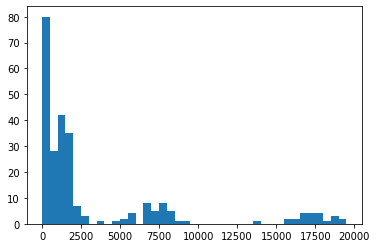

In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
f = open("ertekek.json")
data = json.load(f)
results=[]
for i in data["measurements"]:
    diff=[]
    for j in i["results"]:
        diff.append(j)
    results.append((max(diff)-min(diff)))
step=np.arange(0,20000,500)
plt.hist(results,bins=step)
plt.show()

Itt egy futásoknál keletkezett érték ingadozást szeretném ábrázolni.
Látható hogy a legtöbb esetben, a minták szórása 0-500 közötti érték, de emellett még van sok 1000-2000 szórások is néhány mérésnél.
Az értékek itt azt próbálják megmutatni, hogy mennyire megbízható a teszt. Sajnos a végén igen nagy számok is láthatóak, amik nem túl jó eredmények, de legalább kevés van belőlük.

In [2]:
import json
f = open("ertekek.json")
data = json.load(f)
results=[]
for i in data["measurements"]:
    for j in i["results"]:
        results.append(j)
best=min(results)
worst=max(results)
for i in data["measurements"]:
    for j in i["results"]:
        if(j==best):
            bestPar=i
        if(j==worst):
            worstPar=i
print("best runtime: ",min(results),"\n",bestPar)
print("worst runtime: ",max(results),"\n",worstPar)

best runtime:  115796 
 {'parameters': {'latency': '333400000', 'min_gran': '1000000000', 'wakeup_gran': '1000000000', 'prio': '-6'}, 'results': [138041, 115796, 138227, 139254, 137707]}
worst runtime:  141396 
 {'parameters': {'latency': '1000000000', 'min_gran': '1000000000', 'wakeup_gran': '666666666', 'prio': '6'}, 'results': [141396, 138946, 138398, 132137, 138553]}


A legjobb futási eredmény és annak beállításai:
Ami itt látható hogy viszonylag nagy a szórás a minták között, a legjobbnál például szerepel 141396(ami csúcs eredmény)-132137(egészen átlagos)